# Import Package

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression # untuk  pemodelan dengan logistic regression
from sklearn.neighbors import KNeighborsClassifier # untuk pemodelan dengan K Neighbors Classifier 
from sklearn.ensemble import RandomForestClassifier # untuk pemodelan dengan Random Forest Classifier
from sklearn.tree import DecisionTreeClassifier # untuk pemodelan dengan Decision Tree Classifier
from sklearn.svm import SVC # untuk pemodelan dengan Support Vector Machine dengan tipe Classification
from xgboost import XGBClassifier # untuk pemodelan dengan XGBoost (Extreme Gradient Boosting) untuk tipe Classification
from sklearn.ensemble import  AdaBoostClassifier # untuk pemodelan dengan Adaptive Boosting untuk tipe Classification

from sklearn.model_selection import train_test_split # untuk spliting dataset menjadi train dan test sebagai bagian pemodelan
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, recall_score, precision_score # untuk analisis akurasi, F1, recall, dan precision jika analisis dengan classification report mengalami masalah
from sklearn.metrics import classification_report, confusion_matrix # mengimport package tentang classification report dan confusion matrix
from sklearn.metrics import log_loss, roc_auc_score, roc_curve, auc # ROC : receiver operating characteristic; AUC = Area under curve; Hindari AUC bernilai 0.5 ke bawah; 0.7 sudah bagus
import statsmodels.api as sm # mengimport package tentang statsmodels untuk analisa sebuah model
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, RobustScaler, MinMaxScaler, StandardScaler # mengimport package tentang scaling sebagai bagian dari feature engineering

from sklearn.model_selection import GridSearchCV # mengimport package tentang GridSearchCV untuk hyper parameter tuning dan cross validation (CV)

# untuk mempermudah pemodelan dengan data yang berkategori numerical dan categorical, pipeline dapat digunakan.
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Jika data bersifat imbalanced, beberapa package berikut dapat diimport untuk meng-handle imbalanced data
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer

# Untuk mengekspor dataset ke dashboard
import pickle
import joblib

%matplotlib inline

pd.options.display.max_columns = 999 # biar koloom tidak ada titik2, ditampilkan semua
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format='{:,}'.format

# Import Data

In [2]:
df = pd.read_csv("C:/Users/ASUS/visual_studio_code/modul_3/ujian_modul_3/bank.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.8",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.0,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.1",0


## Permasalahan yang ingin dipecahkan :
- Bagaimana memprediksi apakah seorang nasabah akan menutup akun atau tidak
- Profile client seperti apa yang memiliki nilai akun (kolom 'Balance') sebesar-besarnya
- Profile client seperti apa yang memiliki nilai credit score (kolom 'CreditScore') sebesar-besarnya

## Project Goals:
- Pemodelan tipe 'Classification' yang dapat memprediksi apakah seorang nasabah bank akan menutup akun atau tidak dengan nilai precission, recall, dan F1 yang sebesar-besarnya.
- Meningkatkan probabilitas nasabah untuk menanamkan uang di dalam Bank sebesar mungkin.
- Mengetahui tipe nasabah yang memiliki credit score tinggi 

## Describe Data

In [3]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Handling missing data (NaN values)
### Dari query df.isna().sum(), tidak ada data yang bernilai Nan atau Null sehingga tidak perlu dilakukan penanggulangan dengan Dropna atau Fillna. Namun, nilai outliers perlu ditelusuri.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,"10,000.0","10,000.0","10,000.0","10,000.0","10,000.0","10,000.0","10,000.0","10,000.0","10,000.0","10,000.0","10,000.0"
mean,"5,000.5","15,690,940.5694",650.5288,38.9218,5.0128,"76,485.889288",1.5302,0.7055,0.5151,"100,090.239881",0.2037
std,"2,886.8956799071675","71,936.1861227489",96.65329873613035,10.487806451704609,2.8921743770496837,"62,397.405202385955",0.5816543579989906,0.4558404644751333,0.49979692845891893,"57,510.49281769816",0.4027685839948609
min,1.0,"15,565,701.0",350.0,18.0,0.0,0.0,1.0,0.0,0.0,11.58,0.0
25%,"2,500.75","15,628,528.25",584.0,32.0,3.0,0.0,1.0,0.0,0.0,"51,002.11",0.0
50%,"5,000.5","15,690,738.0",652.0,37.0,5.0,"97,198.54000000001",1.0,1.0,1.0,"100,193.915",0.0
75%,"7,500.25","15,753,233.75",718.0,44.0,7.0,"127,644.24",2.0,1.0,1.0,"149,388.2475",0.0
max,"10,000.0","15,815,690.0",850.0,92.0,10.0,"250,898.09",4.0,1.0,1.0,"199,992.48",1.0


# Data Analysis dengan Crosstab

In [12]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.8",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.0,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.1",0


In [26]:
(pd.crosstab(index=df.Geography, columns=df.Gender, values=df.CreditScore, aggfunc=['mean', 'median', 'min', 'max'])).round(2)

mean        median          min         max     
Gender    Female   Male Female  Male Female Male Female Male
Geography                                                   
France    649.19 650.06  652.0 653.0    350  350    850  850
Germany   653.09 649.97  651.0 650.5    351  350    850  850
Spain     651.77 650.99  653.0 650.0    358  350    850  850

#### Dari hasil crosstab, didapatkan bahwa nasabah wanita (Female) dari Jerman (Germany) memiliki nilai rata-rata (mean) Credit Score yang paling tinggi. Namun, dari nilai median, didapatkan bahwa nasabah wanita dari Spanyol (Spain) dan nasabah pria (Male) dari Perancis (France) sama-sama menduduki nilai tertinggi. Perancis memiliki nasabah dengan Credit Score paling rendah untuk nasabah pria dan wanita, sedangkan nilai Credit Score terendah juga dimiliki oleh nasabah pria dari Jerman dan Spanyol. Untuk nasabah dengan Credit Score tertinggi, ketiga negara memiliki nilai maksimum yang sama untuk kedua gender.

In [27]:
(pd.crosstab(index=df.Geography, columns=df.Gender, values=df.Balance, aggfunc=['mean', 'median', 'min', 'max'])).round(2)

mean               median                  min            \
Gender        Female       Male    Female       Male    Female      Male   
Geography                                                                  
France     60,322.67  63,546.28  47,536.4  69,413.44       0.0       0.0   
Germany   119,145.97 120,259.67 118,907.6 120,120.49 32,197.64 27,288.43   
Spain      59,862.09  63,352.83       0.0   69,857.0       0.0       0.0   

                 max             
Gender        Female       Male  
Geography                        
France    238,387.56 212,692.97  
Germany   206,868.78 214,346.96  
Spain     216,109.88 250,898.09

#### Untuk analisis Crosstab yang menghitung nilai akun per nasabah, nasabah pria dari Jerman memiliki mean isi akun (kolom 'Balance') yang paling tinggi. Nasabah wanita dari Jerman juga memiliki mean Balance yang lebih tinggi daripada nasabah wanita di Perancis dan Spanyol. Dari analisis median, didapatkan bahwa nasabah wanita dari Spanyol bernilai 0 sehingga kebanyakan nasabah wanita dari Spanyol belum menanamkan deposito di Bank walaupun memiliki akun. Alternatif lain adalah nasabah tersebut telah menanamkan deposito tetapi belum mengisi kembali uang ke dalam akun mereka. Dari nilai minimum, ternyata ada nasabah pria dan wanita di Perancis dan Spanyol yang memiliki akun bernilai 0. Dari nilai maximum, nasabah pria dari Spanyol memiliki nilai deposito tertinggi.

In [24]:
pd.crosstab(index=df.Gender, columns=df.Exited, margins=True)

Exited,0,1,All
Gender,,,
Female,3404,1139,4543
Male,4559,898,5457
All,7963,2037,10000


#### Dari analisis Crosstab untuk menghitung nasabah yang menutup akun (0: no yang berarti nasabah tetap membuka akun; 1: yes yang berarti nasabah menutup akun), didapatkan bahwa lebih banyak nasabah wanita yang menutup akun dibandingkan nasabah pria. 

In [25]:
pd.crosstab(index=df.Geography, columns=df.Exited, margins=True)

Exited,0,1,All
Geography,,,
France,4204,810,5014
Germany,1695,814,2509
Spain,2064,413,2477
All,7963,2037,10000


#### Analisis Crosstab yang memprediksi apakah nasabah menutup akun atau tidak menunjukkan bahwa Jerman memiliki nasabah yang paling banyak menutup akun. Spanyol memiliki nasabah yang menutup akun paling sedikit pada 413 nasabah.

# Data Visualization

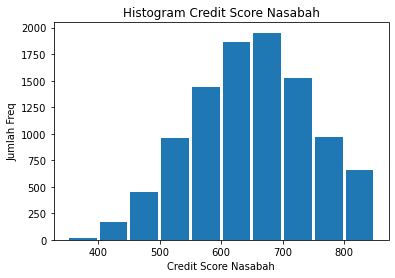

In [51]:
x = df['CreditScore']
plt.hist(x, 10, rwidth=0.9)
plt.title("Histogram Credit Score Nasabah")
plt.xlabel("Credit Score Nasabah")
plt.ylabel("Jumlah Freq")
plt.show()

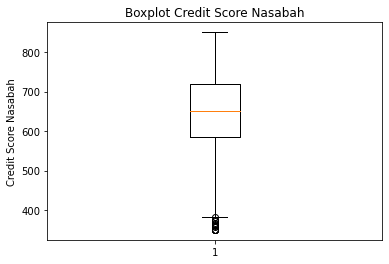

In [69]:
x = df['CreditScore']
plt.boxplot(x)
plt.title("Boxplot Credit Score Nasabah")
plt.ylabel("Credit Score Nasabah")
plt.show()

#### Dari Histogram Credit Score, didapatkan bahwa persebaran bertipe distribusi normal dengan peak pada credit score dengan rentang 650 - 700. Credit Score merupakan nilai yang diperhitungkan oleh Bank untuk melihat kemampuan nasabah untuk membayar pinjaman. Semakin besar Credit Score, semakin besar kemungkinan nasabah untuk melunaskan pinjamannya, dan sebaliknya. Dari boxplot, didapatkan bahwa nasabah dengan credit score di bawah 400 merupakan Outliers. Hal itu diperkirakan lemahnya kemampuan nasabah untuk melunaskan pinjaman dengan credit score yang rendah sehingga nasabah tersebut lebih cenderung menghindari pembukaan deposito di Bank karena Bank juga memungut biaya pada setiap akun.

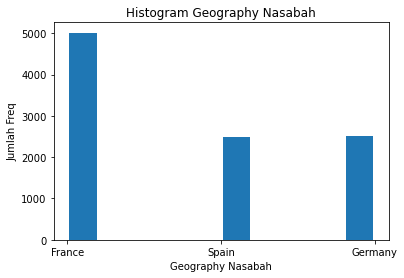

In [55]:
x = df['Geography']
plt.hist(x, 10, rwidth=0.9)
plt.title("Histogram Geography Nasabah")
plt.xlabel("Geography Nasabah")
plt.ylabel("Jumlah Freq")
plt.show()

#### Boxplot tidak dapat digunakan untuk data Categorical sehingga tidak ada Boxplot untuk Geography Nasabah

#### Dari histogram geography nasabah, didapatkan bahwa Bank cabang Perancis memiliki nasabah terbanyak. 

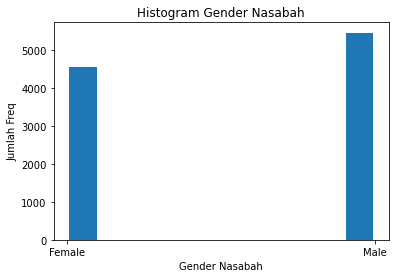

In [57]:
x = df['Gender']
plt.hist(x, 10, rwidth=0.9)
plt.title("Histogram Gender Nasabah")
plt.xlabel("Gender Nasabah")
plt.ylabel("Jumlah Freq")
plt.show()

#### Boxplot tidak dapat digunakan untuk data Categorical sehingga tidak ada Boxplot untuk Gender Nasabah

#### Dari histogram Gender nasabah, jumlah nasabah pria lebih banyak daripada nasabah wanita.

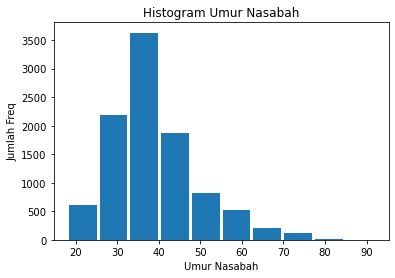

In [59]:
x = df['Age']
plt.hist(x, 10, rwidth=0.9)
plt.title("Histogram Umur Nasabah")
plt.xlabel("Umur Nasabah")
plt.ylabel("Jumlah Freq")
plt.show()

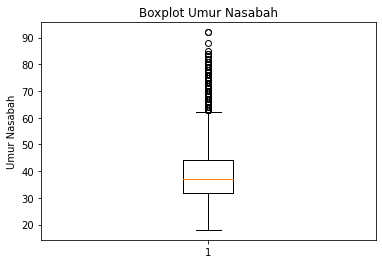

In [70]:
x = df['Age']
plt.boxplot(x)
plt.title("Boxplot Umur Nasabah")
plt.ylabel("Umur Nasabah")
plt.show()

#### Dari histogram umur nasabah, didapatkan bahwa grafik memiliki distribusi normal dengan peak pada nasabah berusia 32 - 40 tahun. Orang pada kelompok usia tersebut cenderung memiliki status pekerjaan dan pendapatan yang lebih stabil sehingga nasabah dengan kelompok usia tersebut lebih cenderung menanamkan deposito di Bank. Untuk kelompok usia 18 - 25 tahun, tidak banyak nasabah karena kelompok usia tersebut kemungkinan besar berstatus murid SMA atau mahasiswa sehingga belum memiliki pendapatan tetap atau stabil. Pada kelompok usia 48 tahun ke atas, jumlah nasabah semakin menurun karena mereka akan pensiun atau sudah pensiun sehingga nasabah pada kelompok usia tersebut cenderung menghindari penanaman deposito karena kurangnya pendapatan mereka. Dari boxplot, didapatkan data outliers pada umur di atas 65 tahun karena kecil jumlah nasabah pada kelompok usia tersebut yang memiliki akun di Bank.

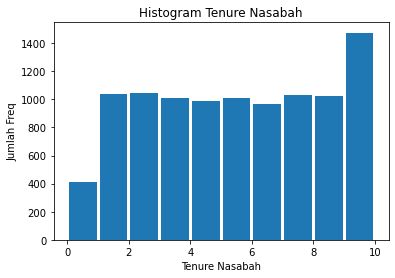

In [61]:
x = df['Tenure']
plt.hist(x, 10, rwidth=0.9)
plt.title("Histogram Tenure Nasabah")
plt.xlabel("Tenure Nasabah")
plt.ylabel("Jumlah Freq")
plt.show()

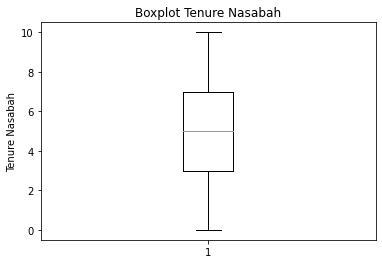

In [71]:
x = df['Tenure']
plt.boxplot(x)
plt.title("Boxplot Tenure Nasabah")
plt.ylabel("Tenure Nasabah")
plt.show()

#### Dari histogram tenure nasabah, didapatkan bahwa jumlah nasabah terbanyak didapat pada tenure teringgi dan jumlah nasabah terkecil pada tenure bernilai 0 atau 1. Dari kamus Bahasa Inggris, tenure dapat berarti jumlah hutang terhadap Bank atau posisi yang telah diraih, namun sulit diperkirakan jika seorang nasabah dapat memiliki 10 jabatan atau gelar sehingga kemungkinan besar tenure adalah jumlah hutang nasabah terhadap Bank. Dari histogram Credit Score, didapatkan bahwa jumlah nasabah terkecil adalah pada kisaran Credit Score < 400. Semakin besar kemampuan nasabah untuk membayar pinjaman, semakin besar kemungkinan Bank untuk memberikan pinjaman kepada nasabah. Maka, nasabah yang memiliki pinjaman kepada Bank juga lebih banyak menanamkan deposito di Bank. Pada Boxplot tenure, didapatkan median pada tenure = 5, Q3 pada 10 dan Q1 pada 0. Tidak ada data outliers untuk kategori tenure.

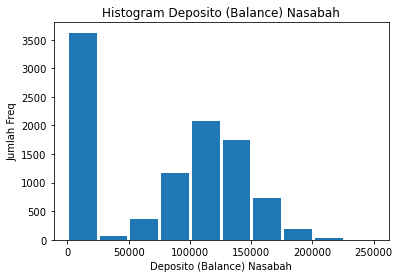

In [63]:
x = df['Balance']
plt.hist(x, 10, rwidth=0.9)
plt.title("Histogram Deposito (Balance) Nasabah")
plt.xlabel("Deposito (Balance) Nasabah")
plt.ylabel("Jumlah Freq")
plt.show()

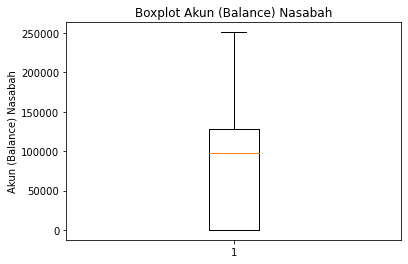

In [72]:
x = df['Balance']
plt.boxplot(x)
plt.title("Boxplot Akun (Balance) Nasabah")
plt.ylabel("Akun (Balance) Nasabah")
plt.show()

#### Histogram balance nasabah menunjukkan bahwa nasabah dengan balance bernilai 0 memiliki jumlah paling banyak. Nilai balance = 0 dapat diartikan nasabah belum menanamkan deposito di Bank atau nasabah telah menanamkan deposito tetapi jumlah uang di akun telah mencapai 0 dan nasabah tersebut belum memasukkan uang ke dalam akun tersebut. Selain itu, didapatkan bahwa jumlah nasabah tersebar secara normal dengan peak pada Balance bernilai 100000 - 125000. Mengingat banyaknya nasabah yang memiliki utang terhadap Bank, dapat dirumuskan bahwa balance = 0 dikarenakan nasabah memiliki akun bernilai 0 dan belum memasukkan uang ke dalam akun tersebut. Dari Boxplot Balance, didapatkan median pada 100000 dan Q3 pada 250000. Grafik tidak memiliki nilai Q1 karena nilai Balance terendah masih memiliki jumlah yang jauh lebih banyak dibandingkan nilai Balance tertinggi (Q1 dan minimum memiliki nilai sama). Tidak ada data outliers yang terdeteksi.

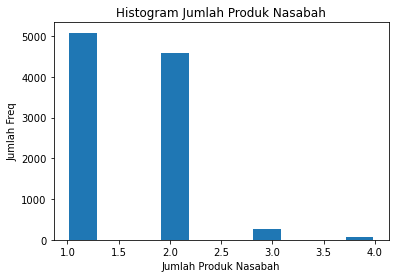

In [65]:
x = df['NumOfProducts']
plt.hist(x, 10, rwidth=0.9)
plt.title("Histogram Jumlah Produk Nasabah")
plt.xlabel("Jumlah Produk Nasabah")
plt.ylabel("Jumlah Freq")
plt.show()

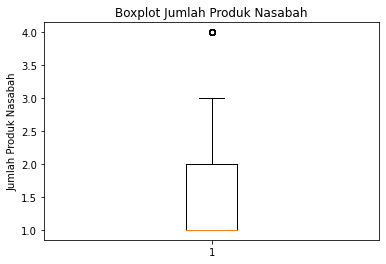

In [73]:
x = df['NumOfProducts']
plt.boxplot(x)
plt.title("Boxplot Jumlah Produk Nasabah")
plt.ylabel("Jumlah Produk Nasabah")
plt.show()

#### Kolom 'NumOfProducts' kemungkinan besar mengacu kepada jumlah akun yang dimiliki oleh nasabah. Nasabah dengan jumlah akun 1 dan 2 memiliki jumlah yang jauh lebih banyak daripada akun berjumlah 3 dan 4. Hal tersebut disebabkan oleh biaya yang dibebankan oleh Bank untuk setiap akun yang dimiliki sehingga nasabah tidak mempunyai insentif untuk memiliki akun dengan jumlah di atas 2. Dari Boxplot yang dihasilkan, nilai median, minimum, dan Q1 ada di nilai 1. Nilai maksimum ada pada 2 dan Q3 pada nilai 3. Data outliers dideteksi pada nilai 4. 

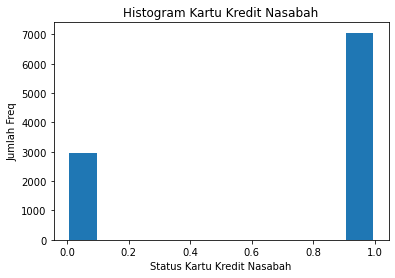

In [67]:
x = df['HasCrCard']
plt.hist(x, 10, rwidth=0.9)
plt.title("Histogram Kartu Kredit Nasabah")
plt.xlabel("Status Kartu Kredit Nasabah")
plt.ylabel("Jumlah Freq")
plt.show()

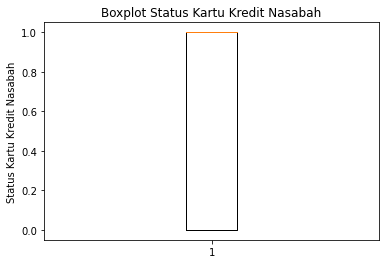

In [74]:
x = df['HasCrCard']
plt.boxplot(x)
plt.title("Boxplot Status Kartu Kredit Nasabah")
plt.ylabel("Status Kartu Kredit Nasabah")
plt.show()

#### Dari histogram kartu kredit ditemukan bahwa lebih banyak nasabah bernilai 1 (mempunyai kartu kredit) dibandingkan yang bernilai 0 (tidak mempunyai kartu kredit). Kartu kredit berfungsi untuk mempermudah transaksi pembayaran dalam kehidupan sehari-hari dan persyaratannya adalah nasabah harus menanamkan uang di Bank terlebih dahulu. Nasabah yang tidak mempunyai kartu kredit kemungkinan disebabkan nasabah tersebut belum memerlukan kartu kredit (insentif kurang) karena beberapa faktor tertentu, seperti persyaratan yang sulit, transaksi sehari-hari dengan cash, dll. Dari Boxplot kartu kredit, nilai median terletak pada 1 karena lebih banyak nasabah yang memiliki kartu kredit daripada yang tidak punya. Nilai minimum dan Q1 ada pada nilai 0 sedangkan maximum dan Q3 ada pada nilai 1. Tidak ada data outliers.

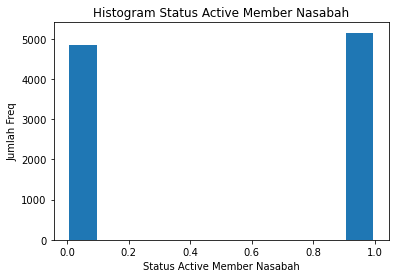

In [42]:
x = df['IsActiveMember']
plt.hist(x, 10, rwidth=0.9)
plt.title("Histogram Status Active Member Nasabah")
plt.xlabel("Status Active Member Nasabah")
plt.ylabel("Jumlah Freq")
plt.show()

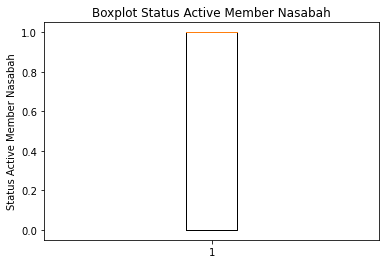

In [75]:
x = df['IsActiveMember']
plt.boxplot(x)
plt.title("Boxplot Status Active Member Nasabah")
plt.ylabel("Status Active Member Nasabah")
plt.show()

#### Dari histogram Active Member, didapatkan bahwa jumlah nasabah pada nilai 0 (bukan active member) dan 1 (active member) hampir sama dengan nilai 1 memiliki jumlah yang lebih banyak. Kemungkinan status active member diberikan kepada nasabah yang banyak melakukan transaksi yang melibatkan Bank untuk periode waktu tertentu (secara bulanan, kuartal, semester, dll). Nasabah yang bukan active member bukanlah nasabah yang tidak melakukan transaksi sama sekali, tetapi jeda transaksi terpisah jauh atau jumlah transaksi di periode waktu yang ditentukan tidak memenuhi persyaratan active member, dll. Dari Boxplot active member, didapatkan nilai median terletak pada 1 karena jumlah nasabah lebih banyak sebagai active member. Nilai minimum dan Q1 pada 0 sedangkan maximum dan Q3 pada 1. Tidak ada data outliers.

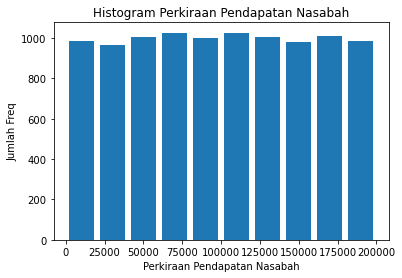

In [47]:
x = df['EstimatedSalary']
plt.hist(x, 10, rwidth=0.8)
plt.title("Histogram Perkiraan Pendapatan Nasabah")
plt.xlabel("Perkiraan Pendapatan Nasabah")
plt.ylabel("Jumlah Freq")
plt.show()

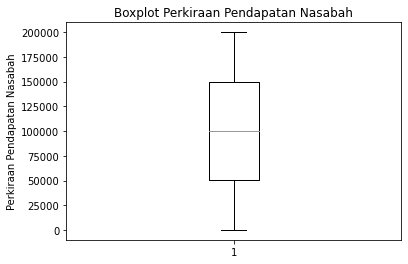

In [76]:
x = df['EstimatedSalary']
plt.boxplot(x)
plt.title("Boxplot Perkiraan Pendapatan Nasabah")
plt.ylabel("Perkiraan Pendapatan Nasabah")
plt.show()

#### Dari histogram pendapatan nasabah, persebarannya hampir merata untuk semua kelompok pendapatan nasabah. Berarti, ada nasabah yang meskipun belum memiliki pendapatan tetapi memiliki akun di Bank, kemungkinan sebagai anak yang bebannya ditanggung oleh orangtua atau wali (atau nasabah lansia yang bebannya ditanggung kerabat yang lebih muda). Dari Boxplot pendapatan nasabah, nilai median terdapat pada nilai 100000, minimum pada 50000, dan maximum pada 150000. Nilai Q1 dan Q3 terletak pada 0 dan 200000. Tidak ada data outliers.

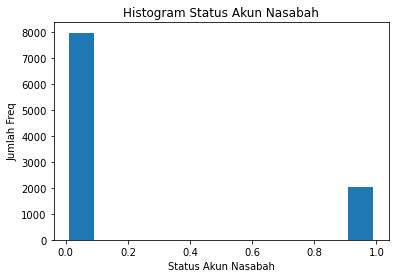

In [48]:
x = df['Exited']
plt.hist(x, 10, rwidth=0.8)
plt.title("Histogram Status Akun Nasabah")
plt.xlabel("Status Akun Nasabah")
plt.ylabel("Jumlah Freq")
plt.show()

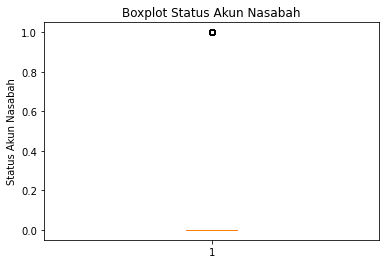

In [77]:
x = df['Exited']
plt.boxplot(x)
plt.title("Boxplot Status Akun Nasabah")
plt.ylabel("Status Akun Nasabah")
plt.show()

#### Dari histogram exited, didapatkan bahwa nasabah yang bernilai 0 (tidak menutup akun) memiliki jumlah yang lebih banyak daripada nasabah bernilai 1 (menutup akun). Rasio perbandingan mendekati 4 : 1. Maka insentif nasabah untuk tetap memiliki akun di Bank lebih besar dari insentif nasabah untuk menutup akun. Dari Boxplot exited, tidak terlihat bentuk kotak karena sebagian besar data exited bernilai 0 sehingga nilai minimum, median, maximum, Q1, dan Q3 terletak pada nilai 0. Nilai 1 dideteksi sebagai data outliers karena jumlahnya yang lebih sedikit.

# Data Preprocessing

In [78]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.8",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.0,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.1",0


In [79]:
df_preprocess = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
df_preprocess.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,"101,348.88",1
1,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,502,France,Female,42,8,"159,660.8",3,1,0,"113,931.57",1
3,699,France,Female,39,1,0.0,2,0,0,"93,826.63",0
4,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.1",0


In [83]:
df_preprocess = pd.get_dummies(data=df_preprocess, columns=['Geography', 'Gender'])

In [84]:
df_preprocess.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.0,1,1,1,"101,348.88",1,1,0,0,1,0
1,608,41,1,"83,807.86",1,0,1,"112,542.58",0,0,0,1,1,0
2,502,42,8,"159,660.8",3,1,0,"113,931.57",1,1,0,0,1,0
3,699,39,1,0.0,2,0,0,"93,826.63",0,1,0,0,1,0
4,850,43,2,"125,510.82",1,1,1,"79,084.1",0,0,0,1,1,0


# Feature Engineering atau Feature Selection

In [85]:
df_preprocess.corr()['Exited']

CreditScore         -0.027093539754658398
Age                    0.2853230378350968
Tenure              -0.014000612253444792
Balance               0.11853276877163839
NumOfProducts        -0.04781986494944309
HasCrCard           -0.007137765603039506
IsActiveMember       -0.15612827818891764
EstimatedSalary      0.012096861026845011
Exited                                1.0
Geography_France     -0.10495515555436995
Geography_Germany     0.17348787015296901
Geography_Spain      -0.05266676206212569
Gender_Female         0.10651248767347121
Gender_Male          -0.10651248767347121
Name: Exited, dtype: float64

### Feature dengan nilai korelasi di bawah nilai yang ditentukan akan didrop. Nilai threshold korelasi adalah |corr| >= 0.1. Maka, feature/kolom yang akan digunakan untuk pemodelan dengan Machine Learning adalah 'Age', 'Balance', 'IsActiveMember', 'Geography', dan 'Gender'.

In [86]:
df_preprocess.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.0,1,1,1,"101,348.88",1,1,0,0,1,0
1,608,41,1,"83,807.86",1,0,1,"112,542.58",0,0,0,1,1,0
2,502,42,8,"159,660.8",3,1,0,"113,931.57",1,1,0,0,1,0
3,699,39,1,0.0,2,0,0,"93,826.63",0,1,0,0,1,0
4,850,43,2,"125,510.82",1,1,1,"79,084.1",0,0,0,1,1,0


In [87]:
df_clean = df_preprocess.drop(columns=['CreditScore', 'Tenure', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary'])
df_clean.head()

,Age,Balance,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,42,0.0,1,1,1,0,0,1,0
1,41,"83,807.86",1,0,0,0,1,1,0
2,42,"159,660.8",0,1,1,0,0,1,0
3,39,0.0,0,0,1,0,0,1,0
4,43,"125,510.82",1,0,0,0,1,1,0


# Train-Test Split

In [88]:
X = df_clean.drop(columns='Exited')
y = df_clean.Exited

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = .2, random_state=42) # stratify dilakukan agar pembagian train dan test nya dilakukan berdasarkan klasifikasi (survived atau tidak), bukan secara keseluruhan saja agar data train tidak hanya survived atau non-survived.

In [90]:
scaler1 = RobustScaler()

X_train_scaled1 = scaler1.fit_transform(X_train)

X_test_scaled1 = scaler1.fit_transform(X_test)

In [91]:
scaler2 = MinMaxScaler()

X_train_scaled2 = scaler2.fit_transform(X_train)

X_test_scaled2 = scaler2.fit_transform(X_test)

In [92]:
scaler3 = StandardScaler()

X_train_scaled3 = scaler3.fit_transform(X_train)

X_test_scaled3 = scaler3.fit_transform(X_test)

In [143]:
X_train.shape

(8000, 8)

In [144]:
X_train_scaled1.shape

(8000, 8)

# Modelling

In [93]:
modelDT = DecisionTreeClassifier()

In [95]:
paramsDT = {
    "max_depth" : [None, 3, 5, 7, 8, 10],    
    "min_samples_split" : range(2,50,1),
    "min_samples_leaf" : range(1,25,1),
    "max_features" : ["auto", 0.3, 0.5, 0.7, 0.8]
}

In [97]:
model_tuning = GridSearchCV(modelDT, paramsDT, cv=3, n_jobs=-1, verbose=1)

model_tuning.fit(X_train, y_train)

Fitting 3 folds for each of 34560 candidates, totalling 103680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 5680 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 11280 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 18480 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 27280 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 37680 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 49680 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 63280 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 78480 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 95280 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 103680 out of 103680 | elapsed:  4.7min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 7, 8, 10],
                         'max_features': ['auto', 0.3, 0.5, 0.7, 0.8],
                         'min_samples_leaf': range(1, 25),
                         'min_samples_split': range(2, 50)},
             verbose=1)

In [98]:
model_tuning_scaledDT = GridSearchCV(modelDT, paramsDT, cv=3, n_jobs=-1, verbose=1)

model_tuning_scaledDT.fit(X_train_scaled1, y_train)

Fitting 3 folds for each of 34560 candidates, totalling 103680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3824 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 11824 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 23024 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 37424 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 55024 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 75824 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 99824 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 103680 out of 103680 | elapsed:  2.5min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 7, 8, 10],
                         'max_features': ['auto', 0.3, 0.5, 0.7, 0.8],
                         'min_samples_leaf': range(1, 25),
                         'min_samples_split': range(2, 50)},
             verbose=1)

In [99]:
model_tuning_scaledDT2 = GridSearchCV(modelDT, paramsDT, cv=3, n_jobs=-1, verbose=1)

model_tuning_scaledDT2.fit(X_train_scaled2, y_train)

Fitting 3 folds for each of 34560 candidates, totalling 103680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 6160 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 11760 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 18960 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 27760 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 38160 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 50160 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 63760 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 78960 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 95760 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 103680 out of 103680 | elapsed:  2.6min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 7, 8, 10],
                         'max_features': ['auto', 0.3, 0.5, 0.7, 0.8],
                         'min_samples_leaf': range(1, 25),
                         'min_samples_split': range(2, 50)},
             verbose=1)

In [157]:
model_tuning_scaledDT3 = GridSearchCV(modelDT, paramsDT, cv=3, n_jobs=-1, verbose=1)

model_tuning_scaledDT3.fit(X_train_scaled3, y_train)

Fitting 3 folds for each of 34560 candidates, totalling 103680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 5680 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 11280 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 18480 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 27280 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 37680 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done 49680 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 63280 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 78480 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 95280 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 103680 out of 103680 | elapsed:  2.7min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 7, 8, 10],
                         'max_features': ['auto', 0.3, 0.5, 0.7, 0.8],
                         'min_samples_leaf': range(1, 25),
                         'min_samples_split': range(2, 50)},
             verbose=1)

In [101]:
modelRF = RandomForestClassifier()

In [105]:
paramsRF = {
    "n_estimators" : [100, 200, 300, 400, 500],
    "max_depth" : [None, 3, 5, 7, 8, 10],
    "min_samples_leaf" : [1, 5, 7, 10, 15],
    "max_features" : ["auto", 0.3, 0.5, 0.7, 0.8]
}

In [106]:
model_tuningRF = GridSearchCV(modelRF, paramsRF, cv=3, n_jobs=-1, verbose=1)

model_tuningRF.fit(X_train, y_train)

Fitting 3 folds for each of 750 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 2250 out of 2250 | elapsed: 12.5min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 7, 8, 10],
                         'max_features': ['auto', 0.3, 0.5, 0.7, 0.8],
                         'min_samples_leaf': [1, 5, 7, 10, 15],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=1)

In [107]:
model_tuning_scaledRF = GridSearchCV(modelRF, paramsRF, cv=3, n_jobs=-1, verbose=1)

model_tuning_scaledRF.fit(X_train_scaled1, y_train)

Fitting 3 folds for each of 750 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 2250 out of 2250 | elapsed: 16.5min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 7, 8, 10],
                         'max_features': ['auto', 0.3, 0.5, 0.7, 0.8],
                         'min_samples_leaf': [1, 5, 7, 10, 15],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=1)

In [167]:
model_tuning_scaledRF2 = GridSearchCV(modelRF, paramsRF, cv=3, n_jobs=-1, verbose=1)

model_tuning_scaledRF2.fit(X_train_scaled2, y_train)

Fitting 3 folds for each of 750 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 2250 out of 2250 | elapsed: 11.2min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 7, 8, 10],
                         'max_features': ['auto', 0.3, 0.5, 0.7, 0.8],
                         'min_samples_leaf': [1, 5, 7, 10, 15],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=1)

In [168]:
model_tuning_scaledRF3 = GridSearchCV(modelRF, paramsRF, cv=3, n_jobs=-1, verbose=1)

model_tuning_scaledRF3.fit(X_train_scaled3, y_train)

Fitting 3 folds for each of 750 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 2250 out of 2250 | elapsed: 11.9min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 7, 8, 10],
                         'max_features': ['auto', 0.3, 0.5, 0.7, 0.8],
                         'min_samples_leaf': [1, 5, 7, 10, 15],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=1)

In [109]:
model_SVM = SVC(max_iter=100)

In [110]:
paramSVM ={
    "C" : [0.1, 0.5, 1],
    "gamma" : np.logspace(-3, 3, 7),
    "class_weight" : [{0: x, 1: 1-x} for x in [0.1, 0.15, 0.2, 0.25, 0.3, 0.05] ]
}

In [111]:
model_tuning_SVM = GridSearchCV(model_SVM, paramSVM, cv=3, n_jobs=-1, verbose=1)

model_tuning_SVM.fit(X_train, y_train)

Fitting 3 folds for each of 126 candidates, totalling 378 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 378 out of 378 | elapsed:    7.5s finished
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, estimator=SVC(max_iter=100), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1],
                         'class_weight': [{0: 0.1, 1: 0.9}, {0: 0.15, 1: 0.85},
                                          {0: 0.2, 1: 0.8}, {0: 0.25, 1: 0.75},
                                          {0: 0.3, 1: 0.7},
                                          {0: 0.05, 1: 0.95}],
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             verbose=1)

In [112]:
model_tuning_scaledSVM = GridSearchCV(model_SVM, paramSVM, cv=3, n_jobs=-1, verbose=1)

model_tuning_scaledSVM.fit(X_train_scaled1, y_train)

Fitting 3 folds for each of 126 candidates, totalling 378 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 363 out of 378 | elapsed:    4.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 378 out of 378 | elapsed:    4.1s finished
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, estimator=SVC(max_iter=100), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1],
                         'class_weight': [{0: 0.1, 1: 0.9}, {0: 0.15, 1: 0.85},
                                          {0: 0.2, 1: 0.8}, {0: 0.25, 1: 0.75},
                                          {0: 0.3, 1: 0.7},
                                          {0: 0.05, 1: 0.95}],
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             verbose=1)

In [114]:
model_tuning_scaledSVM2 = GridSearchCV(model_SVM, paramSVM, cv=3, n_jobs=-1, verbose=1)

model_tuning_scaledSVM2.fit(X_train_scaled2, y_train)

Fitting 3 folds for each of 126 candidates, totalling 378 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 363 out of 378 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 378 out of 378 | elapsed:    3.6s finished
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, estimator=SVC(max_iter=100), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1],
                         'class_weight': [{0: 0.1, 1: 0.9}, {0: 0.15, 1: 0.85},
                                          {0: 0.2, 1: 0.8}, {0: 0.25, 1: 0.75},
                                          {0: 0.3, 1: 0.7},
                                          {0: 0.05, 1: 0.95}],
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             verbose=1)

In [115]:
model_tuning_scaledSVM3 = GridSearchCV(model_SVM, paramSVM, cv=3, n_jobs=-1, verbose=1)

model_tuning_scaledSVM3.fit(X_train_scaled3, y_train)

Fitting 3 folds for each of 126 candidates, totalling 378 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 378 out of 378 | elapsed:    4.5s finished
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, estimator=SVC(max_iter=100), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1],
                         'class_weight': [{0: 0.1, 1: 0.9}, {0: 0.15, 1: 0.85},
                                          {0: 0.2, 1: 0.8}, {0: 0.25, 1: 0.75},
                                          {0: 0.3, 1: 0.7},
                                          {0: 0.05, 1: 0.95}],
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             verbose=1)

In [244]:
ModelXGB = XGBClassifier()

In [245]:
paramXGB ={
    "max_depth" : [1, 3, 5, 7, 10],
    "learning_rate" : [0.1, 0.3, 0.5, 0.7, 0.8],
    "n_estimators" : [100, 200, 300, 400, 500],    
}

In [246]:
model_tuning_XGB = GridSearchCV(ModelXGB, paramXGB, cv=3, n_jobs=-1, verbose=1)

model_tuning_XGB.fit(X_train, y_train)

Fitting 3 folds for each of 125 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:  1.3min finished


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.8],
                         'max_depth': [1, 3, 5, 7, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=1)

In [247]:
model_tuning_scaledXGB = GridSearchCV(ModelXGB, paramXGB, cv=3, n_jobs=-1, verbose=1)

model_tuning_scaledXGB.fit(X_train_scaled1, y_train)

Fitting 3 folds for each of 125 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:  1.3min finished


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.8],
                         'max_depth': [1, 3, 5, 7, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=1)

In [248]:
model_tuning_scaledXGB2 = GridSearchCV(ModelXGB, paramXGB, cv=3, n_jobs=-1, verbose=1)

model_tuning_scaledXGB2.fit(X_train_scaled2, y_train)

Fitting 3 folds for each of 125 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:  1.3min finished


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.8],
                         'max_depth': [1, 3, 5, 7, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=1)

In [249]:
model_tuning_scaledXGB3 = GridSearchCV(ModelXGB, paramXGB, cv=3, n_jobs=-1, verbose=1)

model_tuning_scaledXGB3.fit(X_train_scaled3, y_train)

Fitting 3 folds for each of 125 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:  1.3min finished


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.8],
                         'max_depth': [1, 3, 5, 7, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=1)

# Evaluation Metrics

In [108]:
y_predDT = model_tuning.predict(X_test)

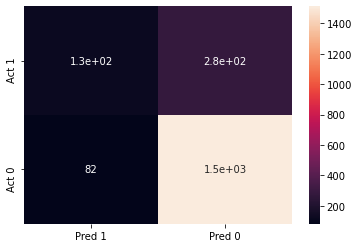

In [116]:
cm = confusion_matrix(y_test, y_predDT, labels=[1, 0]) 
df = pd.DataFrame(cm, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df, annot=True)

In [117]:
print(classification_report(y_test, y_predDT))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1593
           1       0.61      0.31      0.41       407

    accuracy                           0.82      2000
   macro avg       0.72      0.63      0.65      2000
weighted avg       0.79      0.82      0.79      2000



In [219]:
roc_auc_score(y_test, y_predDT)

0.6290535527823664

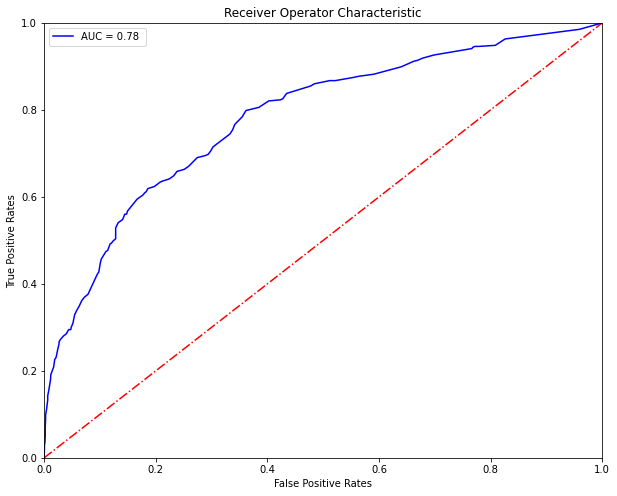

In [218]:
probs = model_tuning.predict_proba(X_test)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

### Confusion Matrix adalah perbandingan antara data aktual dengan data prediksi dari hasil pemodelan Machine Learning. Maka:
- Act 0 : Data yang sebenarnya bernilai 0
- Act 1 : Data yang sebenarnya bernilai 1
- Pred 0 : Data yang diprediksi bernilai 0
- Pred 1 : Data yang diprediksi bernilai 1

### Dari Confusion Matrix, kita dapat menghitung persamaan Precision dan Recall. Precision positif adalah **JUMLAH TEBAKAN BENAR DI KELAS POSITIF**  dibanding **SELURUH TEBAKAN POSITIF** sedangkan  Recall positif adalah **JUMLAH TEBAKAN BENAR DI KELAS POSITIF** dibagi **JUMLAH DATA AKTUAL POSITIF**. Konotasi positif dan negatif ditarik dari apakah nasabah akan menutup akun (positif bernilai 1) atau tidak (negatif bernilai 0). Nilai F1 adalah keseimbangan antara nilai precision dan recall. Penting untuk menemukan nilai F1 yang tinggi karena nilai precision dan recall bersifat trade-off, jika nilai precision naik maka nilai recall akan turun, dan sebaliknya.

### Selain precision dan recall ada istilah False Positive dan False Negative. False Positive adalah data yang ditebak positif tetapi sebenarnya negatif sedangkan False Negative adalah data yang ditebak negatif tetapi sebenarnya positif. Precision yang tinggi berfungsi menurunkan jumlah False Positive sedangkan Recall yang tinggi berfungsi menurunkan jumlah False Negative.

### Pada ujian modul 3 ini, strategi yang dipilih adalah untuk meningkatkan nilai Recall pada Exited = 0. Apabila nilai Recall untuk Exited = 0 bernilai tinggi, maka False Negative diturunkan yang berarti jumlah tebakan nasabah akan menutup akun (Exited tidak bernilai 0) padahal sebenarnya dia tidak berniat menutup akun (Exited nernilai 0) akan diturunkan. Hasilnya, prediksi model yang menebak nasabah tidak menutup akun akan semakin benar. Konsekuensinya adalah tebakan bahwa nasabah tidak akan menutup akun padahal sebenarnya dia akan menutup akun akan turun ketepatannya. Namun, error tersebut lebih ditoleransi daripada model menebak nasabah akan menutup akun padahal kenyataannya nasabah tidak berniat menutup akun. Bila Bank menganggap seorang nasabah akan menutup akun, umumnya strategi yang digunakan adalah marketting promo kepada nasabah tersebut. Namun, pengadaan marketting atau promo yang terlalu banyak dapat menurunkan keuntungan Bank sehingga error prediksi nasabah tidak menutup akun padahal sebenarnya dia menutup akun lebih ditoleransi.

### Dari Classification Report untuk algoritma Decision Tree Classifier, didapatkan bahwa 

In [148]:
y_predDT2 = model_tuning_scaledDT.predict(X_test_scaled1)

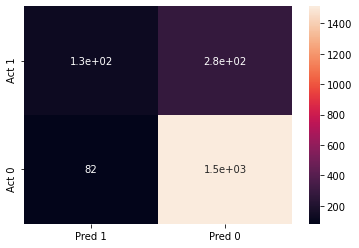

In [149]:
cm = confusion_matrix(y_test, y_predDT2, labels=[1, 0]) 
df = pd.DataFrame(cm, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df, annot=True)

In [151]:
print(classification_report(y_test, y_predDT2))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1593
           1       0.61      0.31      0.41       407

    accuracy                           0.82      2000
   macro avg       0.73      0.63      0.65      2000
weighted avg       0.80      0.82      0.80      2000



In [220]:
roc_auc_score(y_test, y_predDT2)

0.6302820540108677

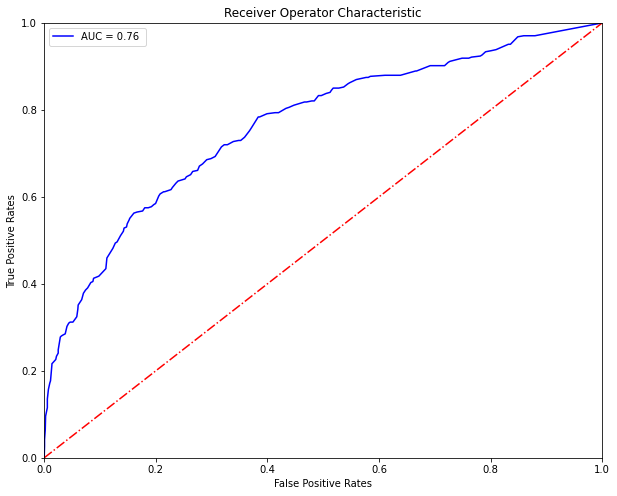

In [225]:
probs = model_tuning_scaledDT.predict_proba(X_test_scaled1)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [152]:
y_predDT3 = model_tuning_scaledDT2.predict(X_test_scaled2)

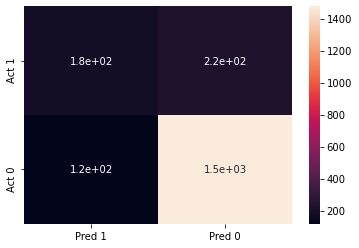

In [154]:
cm = confusion_matrix(y_test, y_predDT3, labels=[1, 0]) 
df = pd.DataFrame(cm, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df, annot=True)

In [155]:
print(classification_report(y_test, y_predDT3))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1593
           1       0.61      0.45      0.52       407

    accuracy                           0.83      2000
   macro avg       0.74      0.69      0.71      2000
weighted avg       0.82      0.83      0.82      2000



In [222]:
roc_auc_score(y_test, y_predDT3)

0.6868640597454158

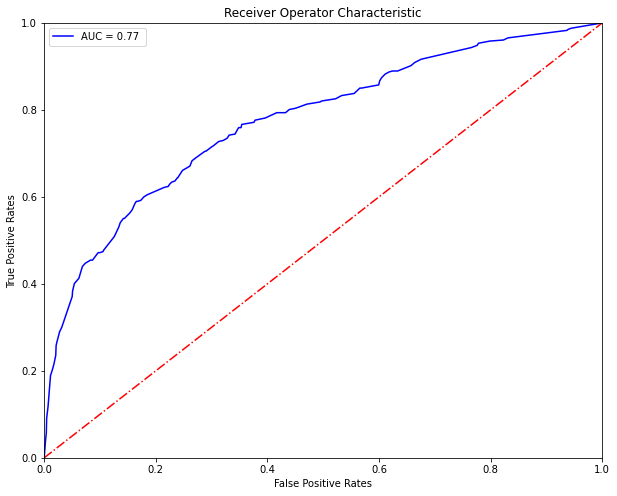

In [226]:
probs = model_tuning_scaledDT2.predict_proba(X_test_scaled2)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [158]:
y_predDT4 = model_tuning_scaledDT3.predict(X_test_scaled3)

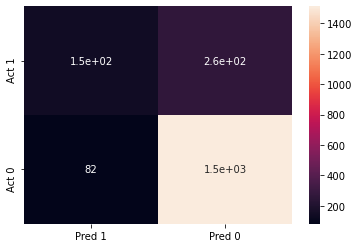

In [159]:
cm = confusion_matrix(y_test, y_predDT4, labels=[1, 0]) 
df = pd.DataFrame(cm, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df, annot=True)

In [160]:
print(classification_report(y_test, y_predDT4))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1593
           1       0.64      0.36      0.46       407

    accuracy                           0.83      2000
   macro avg       0.75      0.65      0.68      2000
weighted avg       0.81      0.83      0.81      2000



In [224]:
roc_auc_score(y_test, y_predDT4)

0.6536235773523908

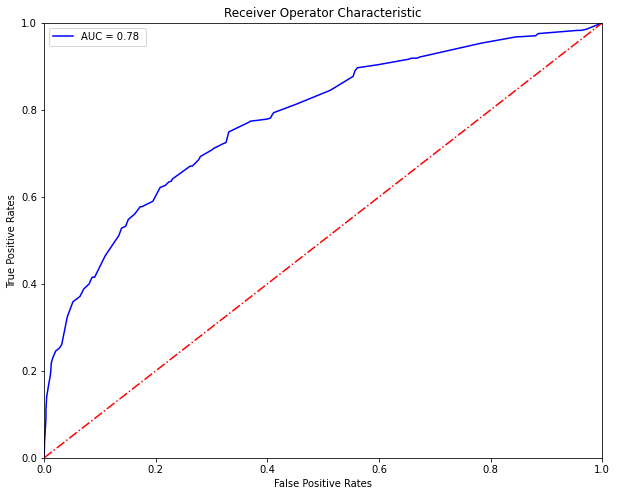

In [227]:
probs = model_tuning_scaledDT3.predict_proba(X_test_scaled3)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [122]:
y_predRF = model_tuningRF.predict(X_test)

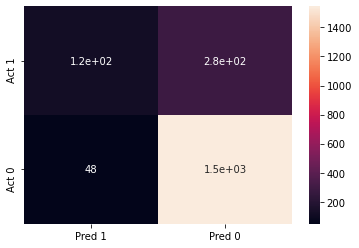

In [123]:
cm = confusion_matrix(y_test, y_predRF, labels=[1, 0]) 
df = pd.DataFrame(cm, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df, annot=True)

In [124]:
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1593
           1       0.72      0.30      0.42       407

    accuracy                           0.83      2000
   macro avg       0.78      0.63      0.66      2000
weighted avg       0.82      0.83      0.81      2000



In [228]:
roc_auc_score(y_test, y_predRF)

0.6348112365061517

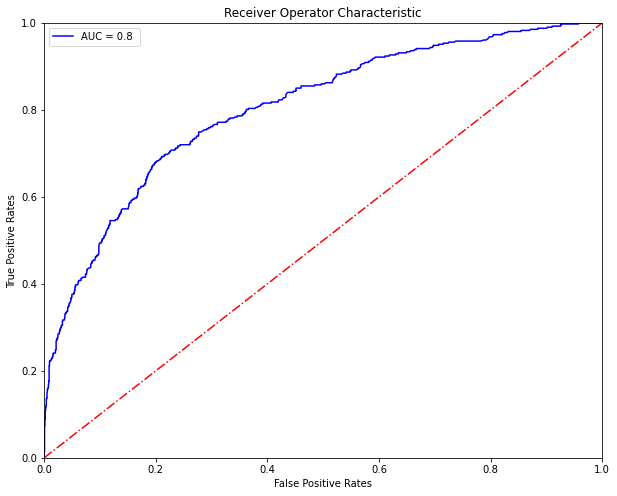

In [230]:
probs = model_tuningRF.predict_proba(X_test)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [170]:
y_predRF2 = model_tuning_scaledRF.predict(X_test_scaled1)

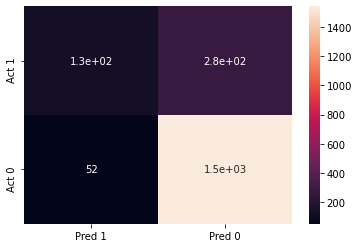

In [171]:
cm = confusion_matrix(y_test, y_predRF2, labels=[1, 0]) 
df = pd.DataFrame(cm, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df, annot=True)

In [172]:
print(classification_report(y_test, y_predRF2))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1593
           1       0.71      0.32      0.44       407

    accuracy                           0.84      2000
   macro avg       0.78      0.64      0.67      2000
weighted avg       0.82      0.84      0.81      2000



In [231]:
roc_auc_score(y_test, y_predRF2)

0.6433837535532451

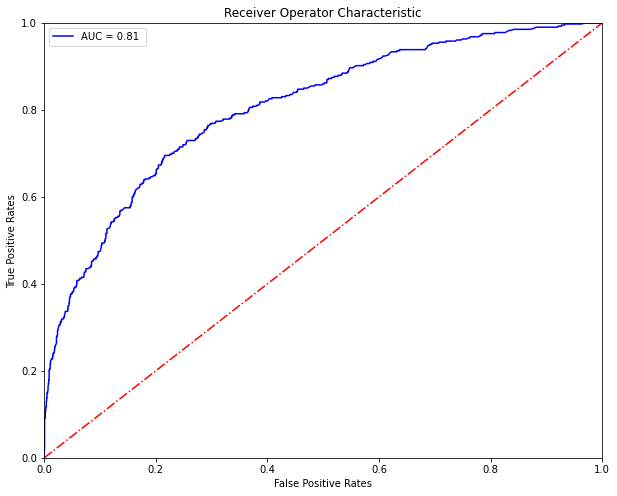

In [232]:
probs = model_tuning_scaledRF.predict_proba(X_test_scaled1)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [173]:
y_predRF3 = model_tuning_scaledRF2.predict(X_test_scaled2)

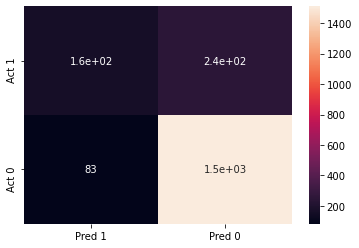

In [174]:
cm = confusion_matrix(y_test, y_predRF3, labels=[1, 0]) 
df = pd.DataFrame(cm, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df, annot=True)

In [175]:
print(classification_report(y_test, y_predRF3))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1593
           1       0.66      0.40      0.50       407

    accuracy                           0.84      2000
   macro avg       0.76      0.67      0.70      2000
weighted avg       0.82      0.84      0.82      2000



In [233]:
roc_auc_score(y_test, y_predRF3)

0.6729657238131815

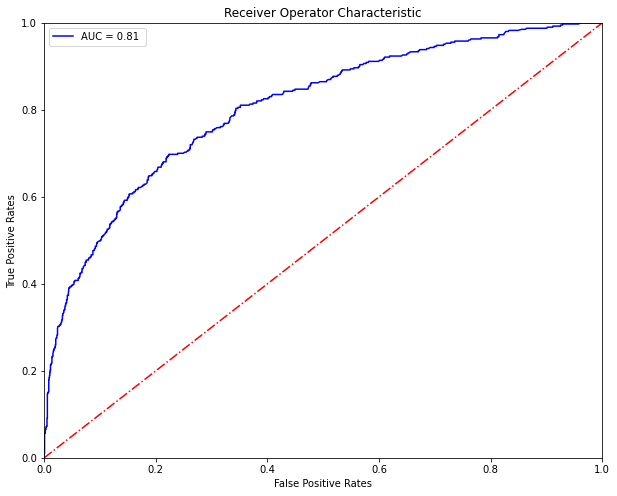

In [234]:
probs = model_tuning_scaledRF2.predict_proba(X_test_scaled2)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [176]:
y_predRF4 = model_tuning_scaledRF3.predict(X_test_scaled3)

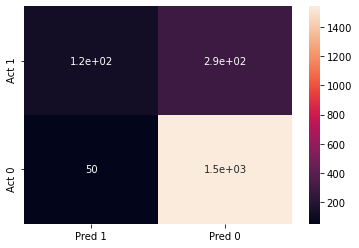

In [177]:
cm = confusion_matrix(y_test, y_predRF4, labels=[1, 0]) 
df = pd.DataFrame(cm, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df, annot=True)

In [178]:
print(classification_report(y_test, y_predRF4))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1593
           1       0.71      0.30      0.42       407

    accuracy                           0.83      2000
   macro avg       0.78      0.63      0.66      2000
weighted avg       0.82      0.83      0.80      2000



In [235]:
roc_auc_score(y_test, y_predRF4)

0.6329549888871924

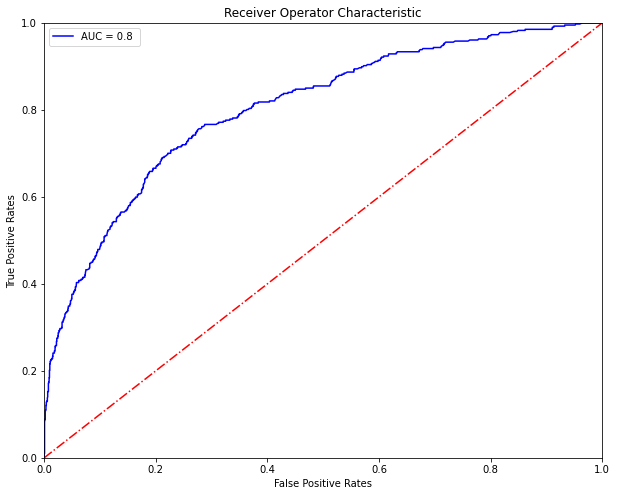

In [236]:
probs = model_tuning_scaledRF3.predict_proba(X_test_scaled3)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [179]:
y_predSVM = model_tuning_SVM.predict(X_test)

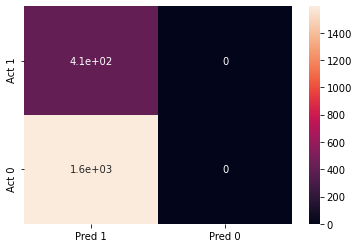

In [180]:
cm = confusion_matrix(y_test, y_predSVM, labels=[1, 0]) 
df = pd.DataFrame(cm, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df, annot=True)

In [181]:
print(classification_report(y_test, y_predSVM))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1593
           1       0.20      1.00      0.34       407

    accuracy                           0.20      2000
   macro avg       0.10      0.50      0.17      2000
weighted avg       0.04      0.20      0.07      2000



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [182]:
y_predSVM2 = model_tuning_scaledSVM.predict(X_test_scaled1)

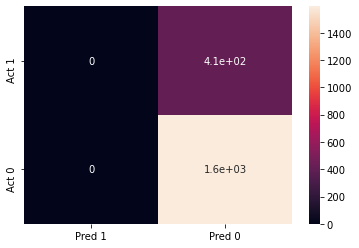

In [183]:
cm = confusion_matrix(y_test, y_predSVM2, labels=[1, 0]) 
df = pd.DataFrame(cm, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df, annot=True)

In [184]:
print(classification_report(y_test, y_predSVM2))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [185]:
y_predSVM3 = model_tuning_scaledSVM2.predict(X_test_scaled2)

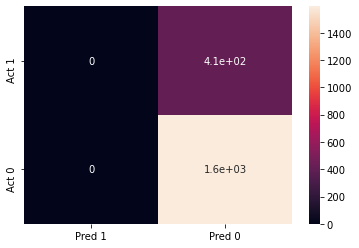

In [186]:
cm = confusion_matrix(y_test, y_predSVM3, labels=[1, 0]) 
df = pd.DataFrame(cm, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df, annot=True)

In [187]:
print(classification_report(y_test, y_predSVM3))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [188]:
y_predSVM4 = model_tuning_scaledSVM3.predict(X_test_scaled3)

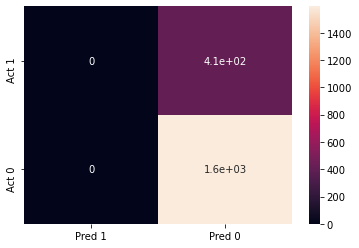

In [189]:
cm = confusion_matrix(y_test, y_predSVM4, labels=[1, 0]) 
df = pd.DataFrame(cm, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df, annot=True)

In [190]:
print(classification_report(y_test, y_predSVM4))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [250]:
y_predX = model_tuning_XGB.predict(X_test)

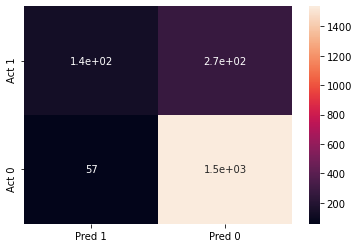

In [251]:
cm = confusion_matrix(y_test, y_predX, labels=[1, 0]) 
df = pd.DataFrame(cm, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df, annot=True)

In [252]:
print(classification_report(y_test, y_predX))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1593
           1       0.70      0.33      0.45       407

    accuracy                           0.84      2000
   macro avg       0.78      0.65      0.68      2000
weighted avg       0.82      0.84      0.81      2000



In [237]:
roc_auc_score(y_test, y_predX)

0.6491853949481068

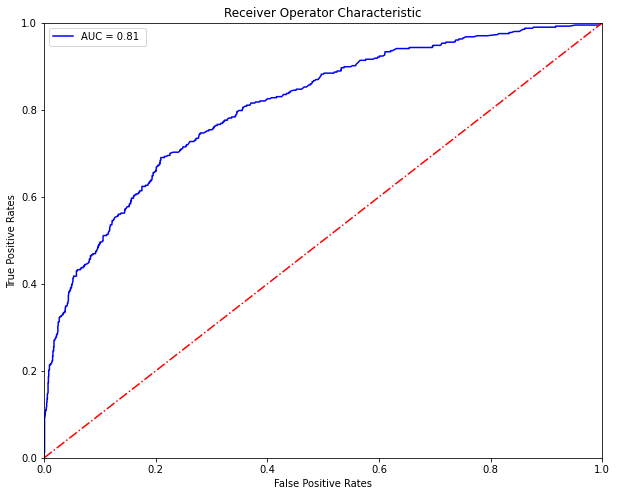

In [256]:
probs = model_tuning_XGB.predict_proba(X_test)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [253]:
y_predX2 = model_tuning_scaledXGB.predict(X_test_scaled1)

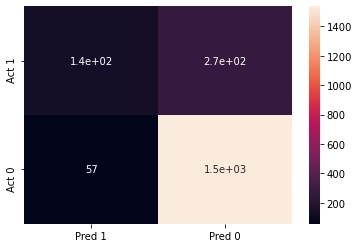

In [254]:
cm = confusion_matrix(y_test, y_predX2, labels=[1, 0]) 
df = pd.DataFrame(cm, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df, annot=True)

In [257]:
print(classification_report(y_test, y_predX2))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1593
           1       0.71      0.34      0.46       407

    accuracy                           0.84      2000
   macro avg       0.78      0.65      0.68      2000
weighted avg       0.82      0.84      0.81      2000



In [258]:
roc_auc_score(y_test, y_predX2)

0.650413896176608

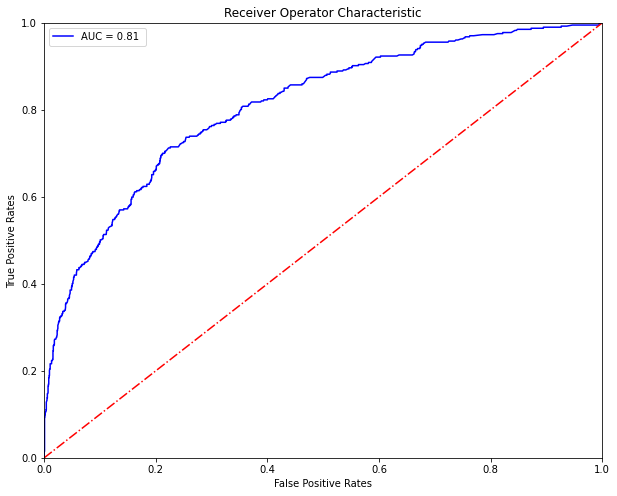

In [259]:
probs = model_tuning_scaledXGB.predict_proba(X_test_scaled1)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [260]:
y_predX3 = model_tuning_scaledXGB2.predict(X_test_scaled2)

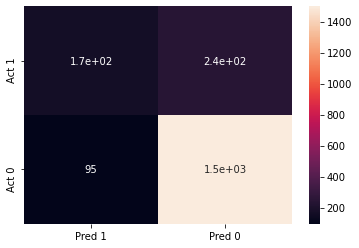

In [261]:
cm = confusion_matrix(y_test, y_predX3, labels=[1, 0]) 
df = pd.DataFrame(cm, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df, annot=True)

In [262]:
print(classification_report(y_test, y_predX3))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1593
           1       0.64      0.41      0.50       407

    accuracy                           0.83      2000
   macro avg       0.75      0.68      0.70      2000
weighted avg       0.82      0.83      0.82      2000



In [263]:
roc_auc_score(y_test, y_predX3)

0.6765702528414392

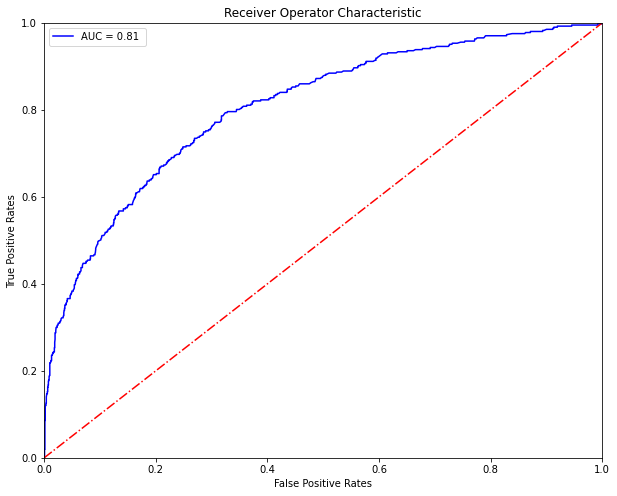

In [264]:
probs = model_tuning_scaledXGB2.predict_proba(X_test_scaled2)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

In [265]:
y_predX4 = model_tuning_scaledXGB3.predict(X_test_scaled3)

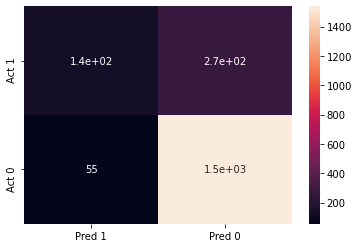

In [266]:
cm = confusion_matrix(y_test, y_predX4, labels=[1, 0]) 
df = pd.DataFrame(cm, 
                 columns=['Pred 1', 'Pred 0'],
                 index = ['Act 1', 'Act 0'])
sns.heatmap(df, annot=True)

In [267]:
print(classification_report(y_test, y_predX4))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1593
           1       0.71      0.33      0.45       407

    accuracy                           0.84      2000
   macro avg       0.78      0.65      0.68      2000
weighted avg       0.82      0.84      0.81      2000



In [268]:
roc_auc_score(y_test, y_predX4)

0.6485846401100638

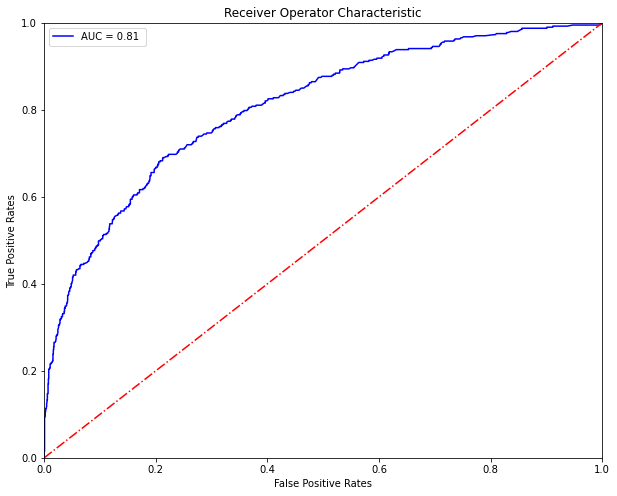

In [269]:
probs = model_tuning_scaledXGB3.predict_proba(X_test_scaled3)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
sc = round(auc(fpr,tpr),2)

plt.figure(figsize=(10,8))
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, 'b', label=f'AUC = {sc} ')

plt.plot([0,1], [0,1], 'r-.')

plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(loc=2)
plt.ylabel("True Positive Rates")
plt.xlabel("False Positive Rates")
plt.show()

### Algoritma SVM memiliki nilai Precision dan Recall yang rendah untuk Exited = 0 dan Exited = 1 sehingga tidak diperhitungkan.

### Tipe scaler yang memberikan nilai F1-score tertinggi untuk kasus Exited = 1 adalah MinMaxScaler(). Maka, tipe scaler ini dipilih agar nilai Recall pada Exited = 1 tidak terlalu rendah.

In [141]:
print(classification_report(y_test, y_predDT)) # Decision Tree tanpa Scaling

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1593
           1       0.61      0.31      0.41       407

    accuracy                           0.82      2000
   macro avg       0.72      0.63      0.65      2000
weighted avg       0.79      0.82      0.79      2000



In [212]:
print(classification_report(y_test, y_predDT3)) # Decision Tree dengan MinMaxScaling()

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1593
           1       0.61      0.45      0.52       407

    accuracy                           0.83      2000
   macro avg       0.74      0.69      0.71      2000
weighted avg       0.82      0.83      0.82      2000



In [140]:
print(classification_report(y_test, y_predRF)) # Random Forest tanpa Scaling

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1593
           1       0.72      0.30      0.42       407

    accuracy                           0.83      2000
   macro avg       0.78      0.63      0.66      2000
weighted avg       0.82      0.83      0.81      2000



In [213]:
print(classification_report(y_test, y_predRF3))# Random Forest dengan MinMaxScaling()

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1593
           1       0.66      0.40      0.50       407

    accuracy                           0.84      2000
   macro avg       0.76      0.67      0.70      2000
weighted avg       0.82      0.84      0.82      2000



In [270]:
print(classification_report(y_test, y_predX)) # XGBoost tanpa Scaling

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1593
           1       0.70      0.33      0.45       407

    accuracy                           0.84      2000
   macro avg       0.78      0.65      0.68      2000
weighted avg       0.82      0.84      0.81      2000



In [271]:
print(classification_report(y_test, y_predX3)) # XGBoost dengan MinMaxScaling()

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1593
           1       0.64      0.41      0.50       407

    accuracy                           0.83      2000
   macro avg       0.75      0.68      0.70      2000
weighted avg       0.82      0.83      0.82      2000



### Algoritma Decision Tree yang di-scaling dengan MinMaxScaler() memiliki nilai F1-score terbaik untuk Exited = 1, maka algoritma tersebut dipilih untuk membangun model yang memprediksi apakah nasabah akan menutup akun atau tidak. 

# Kesimpulan :
- Model machine learning dengan tipe Decision Tree Classifier yang di-scaling dengan MinMaxScaler() dipilih untuk memprediksi apakah nasabah akan menutup akun di Bank atau tidak. Model ini dipilih karena memiliki nilai ROC_AUC dan F1-score yang tertinggi dibandingkan model yang lain.
- Nilai mean Credit Score yang tinggi umumnya dimiliki oleh nasabah wanita dan berdomisili di Jerman.
- Nilai mean Balance akun di Bank yang besar umumnya dimiliki oleh nasabah pria dan berdomisili di Jerman.
- Untuk meningkatkan keuntungan, Bank perlu meningkatkan jumlah nasabah yang berdomisili di Jerman untuk menanamkan deposito di Bank.

In [274]:
with open('bankModel', 'wb') as ML:
    pickle.dump(model_tuning_scaledDT2, ML)